### Importing neccessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [2]:
# load the data from csv file to Pandas DataFrame
df = pd.read_csv("loan_approval_dataset.csv")

#### Viewing first 5 rows of the data

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


#### Viewing the columns of the dataset

In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

#### Removing unwanted spaces attached with column headers

In [5]:
df.columns = df.columns.str.strip()

### Exploratory Data Analysis

### Univariate Analysis

#### Numeric Variables

Text(0, 0.5, 'Frequency')

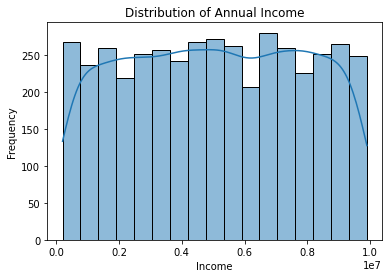

In [6]:
# Distribution of Annual Income
sns.histplot(df['income_annum'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

Observation
* The annual income data is spread relatively evenly/uniformly across the entire range.
* There isn't a significant concentration of incomes in any particular range; rather, incomes are distributed consistently across the observed spectrum.

Text(0, 0.5, 'Frequency')

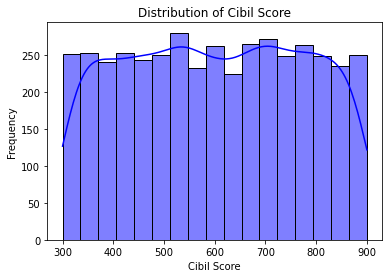

In [7]:
# Distribution of Cibil Score
sns.histplot(df['cibil_score'],kde=True, color='blue')
plt.title('Distribution of Cibil Score')
plt.xlabel('Cibil Score')
plt.ylabel('Frequency')

Observation
* The CIBIL score data is also spread relatively evenly/uniformly across the range from 300 to 900.
* There is no significant concentration of scores in any particular range; rather, scores are distributed consistently across the observed spectrum.

Text(0, 0.5, 'Count')

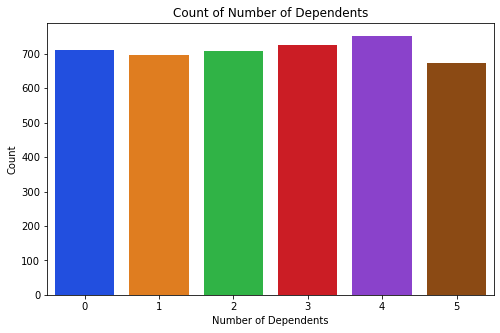

In [8]:
# Cibil Score
plt.figure(figsize=(8, 5))
sns.countplot(x='no_of_dependents', data=df, palette='bright')
plt.title('Count of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')

Observation
* The distribution of the number of dependents is fairly even across the different categories.
* There is no single category with a significantly higher or lower count compared to the others.
* Overall individuals are almost equally likely to have between 0 and 5 dependents.
* The number of individuals with 0, 2, 3, and 4 dependents is slightly higher compared to those with 1 and 5 dependents.
* The bar for 5 dependents is the shortest, indicating it is the least common number of dependents, though not by a large margin.

Text(0, 0.5, 'Density')

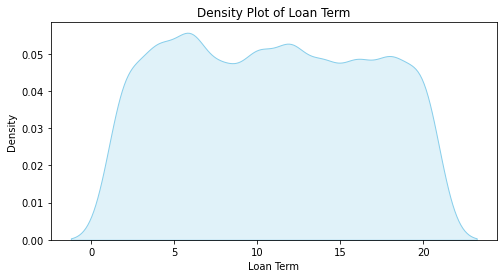

In [9]:
#Density plot of Loan Term
plt.figure(figsize=(8, 4))
sns.kdeplot(df['loan_term'], shade=True, color='skyblue')
plt.title('Density Plot of Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Density')

Observation
* The density plot of Loan Term shows that there is a peak in the density of loans around the 5-year mark. 
* This means that there are more loans with a term of 5 years than there are loans with any other term. 
* The density then tapers off on either side of the peak, indicating that there are fewer loans with terms that are much shorter or much longer than 5 years.
* Overall the loan_term is more or less evenly distributed across 5 to 20 yrs, with little variation.

#### Categorical Variables

Text(0, 0.5, 'Count')

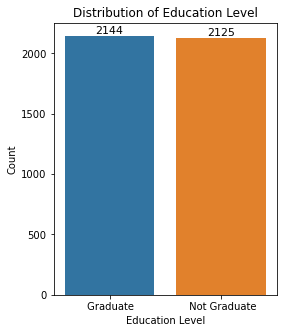

In [10]:
#Eduaction level
plt.figure(figsize=(4, 5))
ax = sns.countplot(x='education', data=df)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

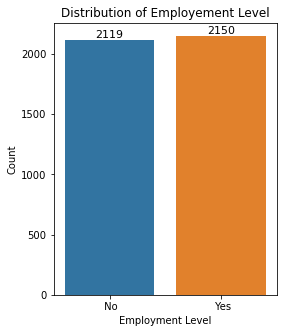

In [11]:
# Employement Level
plt.figure(figsize=(4, 5))
ax = sns.countplot(x='self_employed', data=df)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Distribution of Employement Level')
plt.xlabel('Employment Level')
plt.ylabel('Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'residential_assets_value'),
  Text(1, 0, 'commercial_assets_value'),
  Text(2, 0, 'luxury_assets_value'),
  Text(3, 0, 'bank_asset_value')])

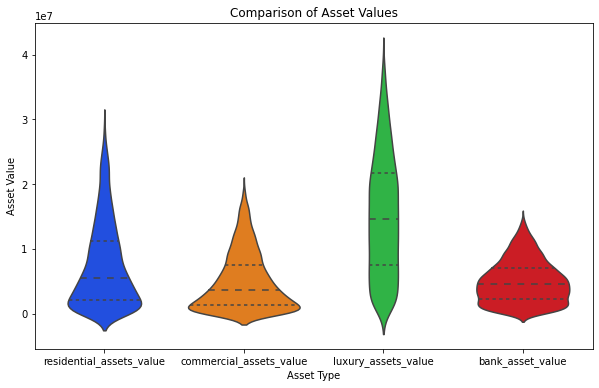

In [12]:
# Asset values
asset_values = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Creating a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[asset_values], inner="quartile", palette="bright")
plt.title('Comparison of Asset Values')
plt.xlabel('Asset Type')
plt.ylabel('Asset Value')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed

Observation
* The asset type with the highest median asset value is luxury_assets_value. The center line in the violin plot for this category extends the furthest up on the y-axis.
* There is more variability in the asset values for residential_assets_value and commercial_assets_value compared to luxury_assets_value. The violin bodies for the residential and commercial asset types are wider than the violin body for luxury assets.
* The interquartile range (IQR) is larger for residential_assets_value than for commercial_assets_value.

### Bivariate Analysis

#### Numeric vs. Numeric

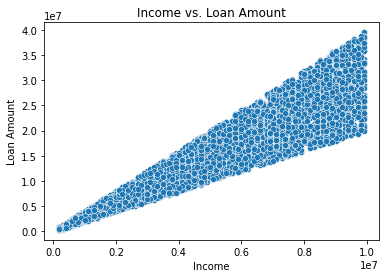

In [13]:
#Income vs Loan Amount
sns.scatterplot(x='income_annum', y='loan_amount', data=df)
plt.title('Income vs. Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()


Observation
* There is a general upward trend, with higher income levels corresponding to higher loan amounts. 
* The data points are spread out, which means there is some variation in loan amounts for people with similar incomes.
* The income axis extends much further than the loan amount axis. The highest income value is around 10 times greater than the highest loan amount value.
* There are a few data points that fall below the trend line. This means that some people with lower incomes have higher loan amounts than some people with higher incomes.

#### Categorical vs. Numeric

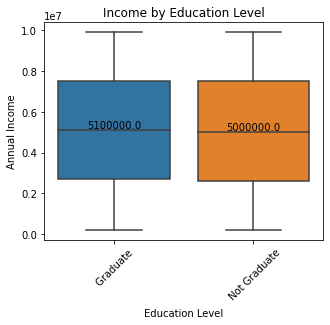

In [14]:
#Income vs Education level
plt.figure(figsize=(5,4))
sns.boxplot(x='education', y='income_annum', data=df)

# Add data labels
medians = df.groupby(['education'])['income_annum'].median().values
for i, median in enumerate(medians):
    plt.text(i, median, f'{median}', ha='center', va='bottom', fontdict={'fontsize': 10})

plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

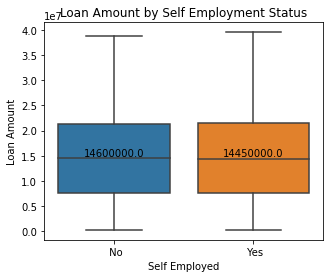

In [15]:
#Loan Amount vs Employement status
plt.figure(figsize=(5, 4))
sns.boxplot(x='self_employed', y='loan_amount', data=df)

# Add data labels
medians = df.groupby(['self_employed'])['loan_amount'].median().values
for i, median in enumerate(medians):
    plt.text(i, median, f'{median}', ha='center', va='bottom', fontdict={'fontsize': 10})

plt.title('Loan Amount by Self Employment Status')
plt.xlabel('Self Employed')
plt.ylabel('Loan Amount')
plt.show()

#### Categorical vs. Categorical

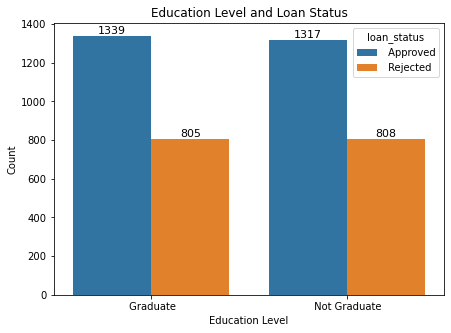

In [16]:
#Education Lvel vs Loan status
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='education', hue='loan_status', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Education Level and Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

### Multivariate Analysis

#### Pairplot

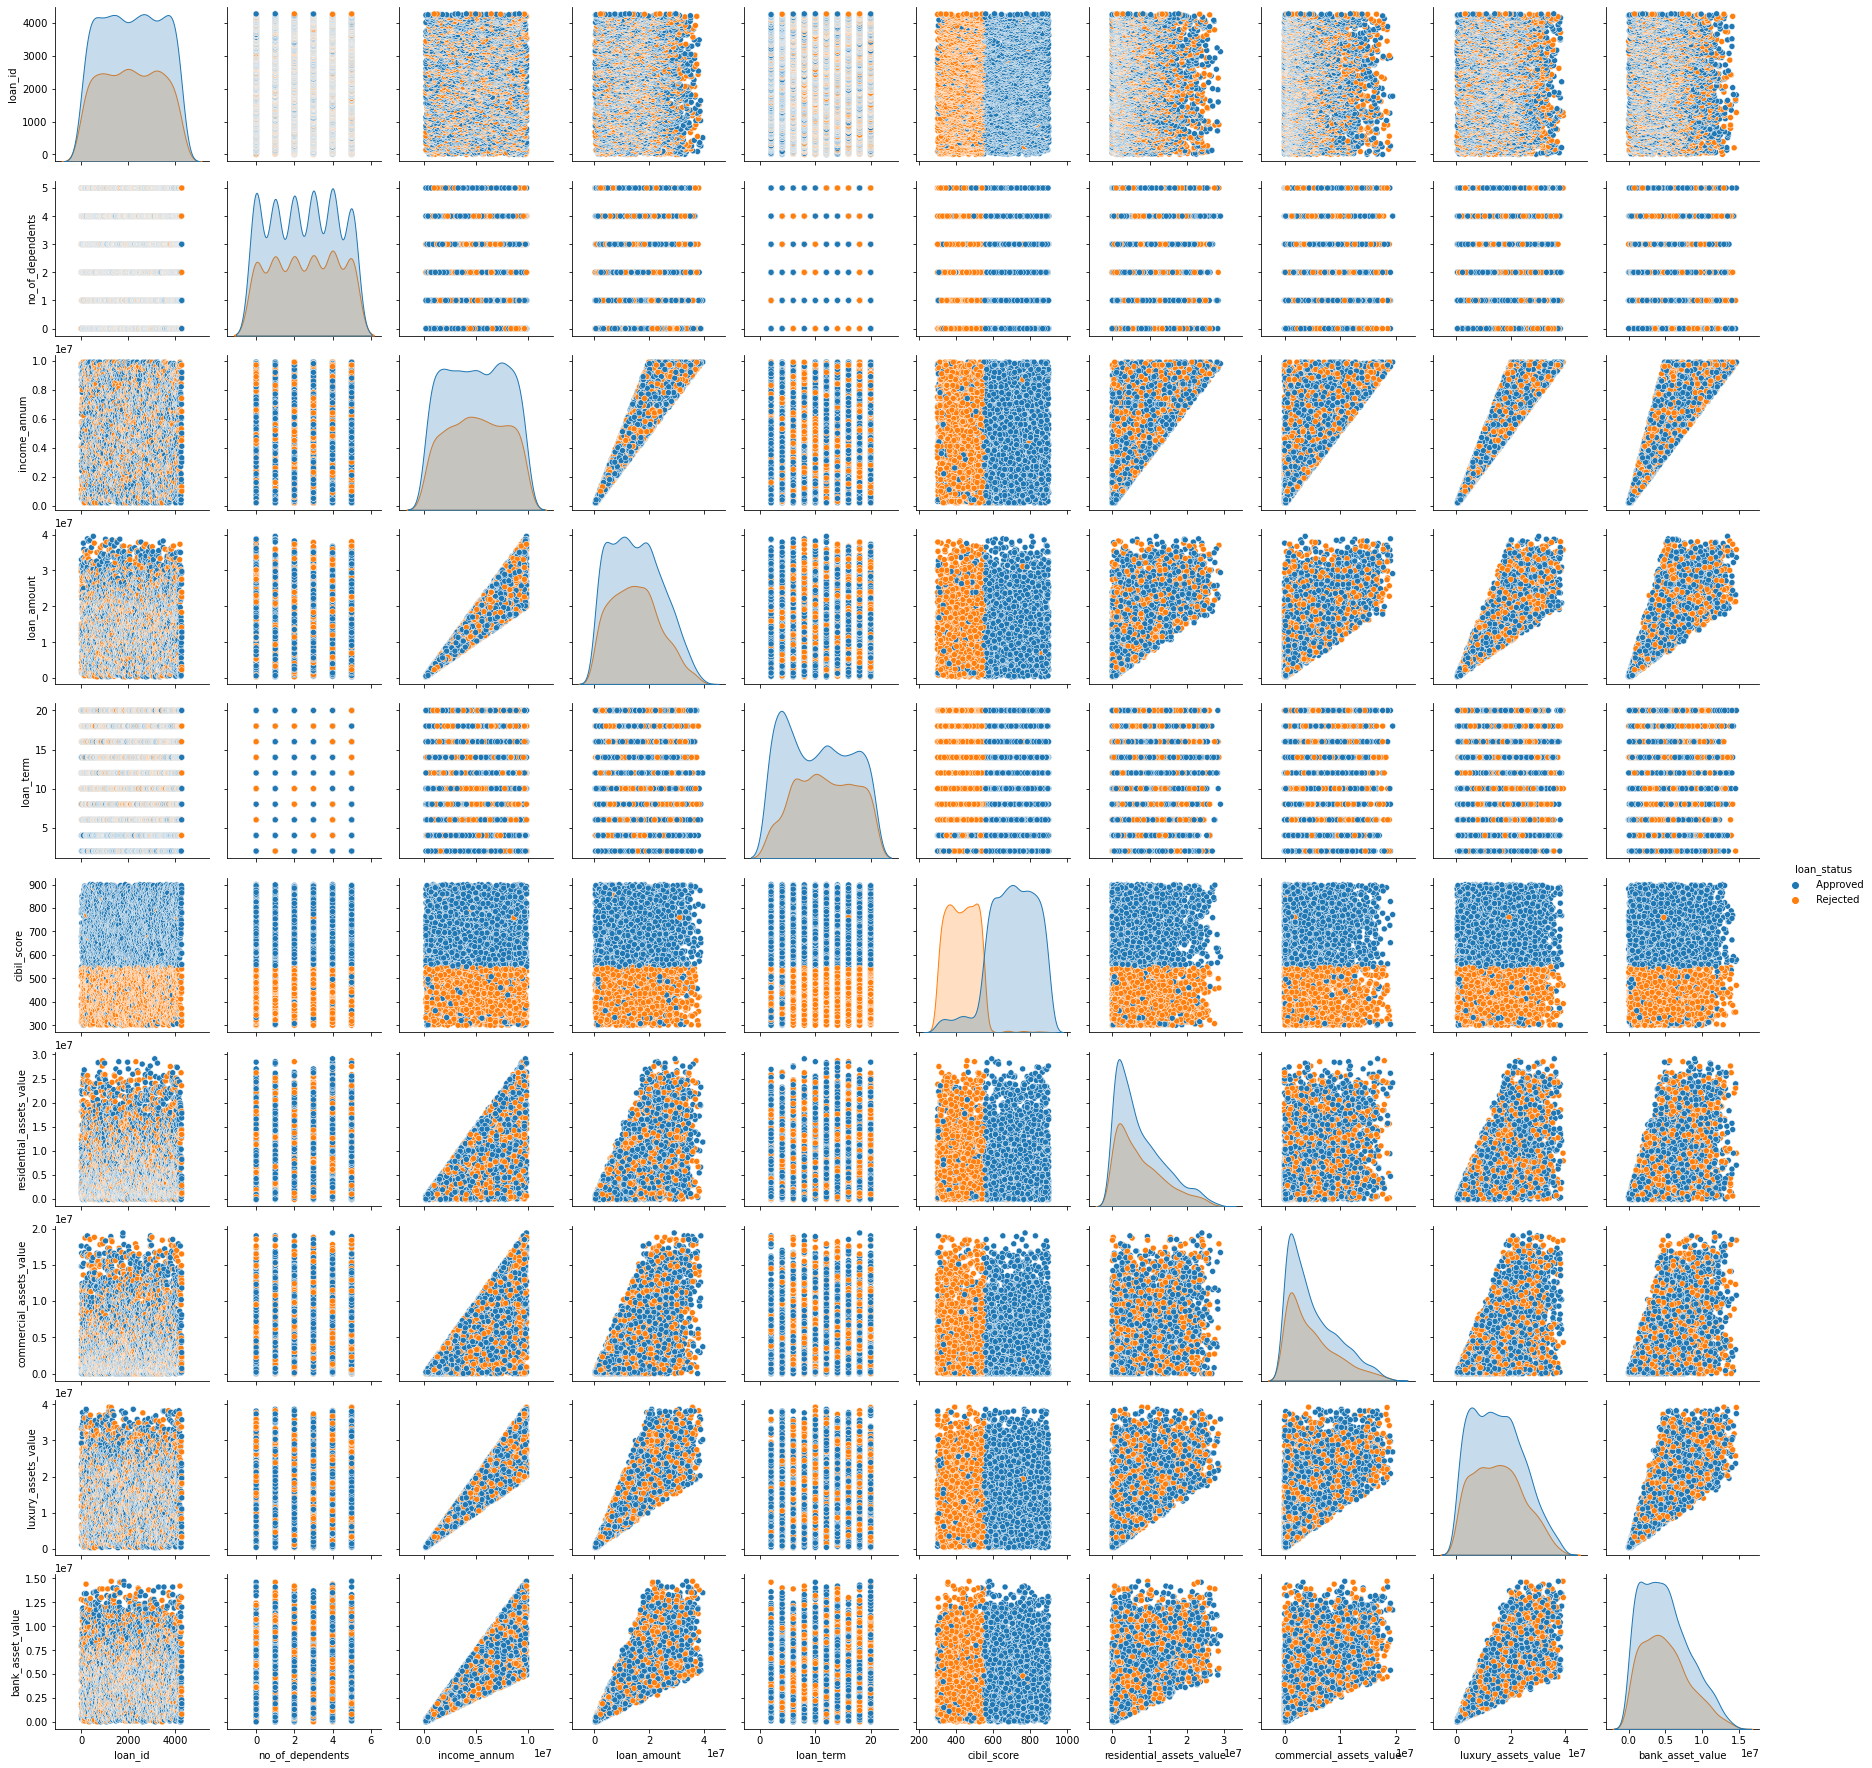

In [17]:
sns.pairplot(df, hue='loan_status')
plt.show()


#### Correlation Matrix

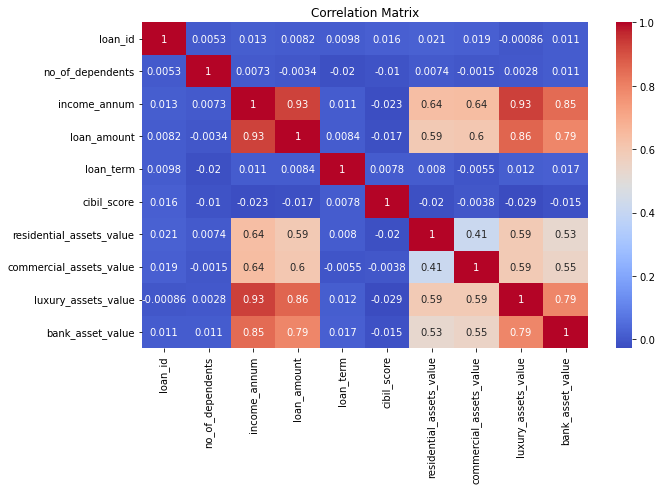

In [18]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
